# EDA of the King County House Sales Data Set

## Table of Contents <a Class="anchor" id="top"></a>

- [Variable Description](#variables)
- [Import of all Python Packages](#packageimport)
- [Data Import and First Glance at the Data](#dataimport)
- [Types of Data and Missing Values](#typesofdata)
- [Had Some Houses Been Sold More Than Once?](#duplicates)
- [Basic Statistics and Correlation Matrix](#basicstats)
- [Adding new Features](#newfeatures)
    - [Price per Sqft](#pricepersqft)
    - [Binning of Bedrooms and Bathrooms](#binningbb)

# Variable Description <a class = "anchor" id = "variables"></a>

* **id** - unique identifier for a house
* **date** - Date the house was sold
* **price** -  Price the house was sold (prediction target)
* **bedrooms** -  Number of Bedrooms/House
* **bathrooms** -  Numberof bathrooms/bedrooms
* **sqft_living** -  square footage of the home
* **sqft_lot** -  square footage of the lot
* **floors** -  Total floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition** - How good the overall condition is
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zipcode
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

# Import of all Python Packages <a class = "anchor" id = "packageimport"></a>

In [ ]:
reset -fs

In [2]:
import datetime
import pandas as pd
import numpy as np
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics

%matplotlib widget

# Data Import and First Glance at the Data <a class = "anchor" id = "dataimport"></a>

In [3]:
houses = pd.read_csv("data/King_County_House_prices_dataset.csv")

In [4]:
data_size = houses.shape
print(data_size)

(21597, 21)


In [5]:
pd.set_option("display.max_columns", None)

In [6]:
houses.head(10)

id        date      price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014   221900.0         3       1.00         1180   
1  6414100192   12/9/2014   538000.0         3       2.25         2570   
2  5631500400   2/25/2015   180000.0         2       1.00          770   
3  2487200875   12/9/2014   604000.0         4       3.00         1960   
4  1954400510   2/18/2015   510000.0         3       2.00         1680   
5  7237550310   5/12/2014  1230000.0         4       4.50         5420   
6  1321400060   6/27/2014   257500.0         3       2.25         1715   
7  2008000270   1/15/2015   291850.0         3       1.50         1060   
8  2414600126   4/15/2015   229500.0         3       1.00         1780   
9  3793500160   3/12/2015   323000.0         3       2.50         1890   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   
5    101930     1.0         0.0   0.0          3     11        3890   
6      6819     2.0         0.0   0.0          3      7        1715   
7      9711     1.0         0.0   NaN          3      7        1060   
8      7470     1.0         0.0   0.0          3      7        1050   
9      6560     2.0         0.0   0.0          3      7        1890   

  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           0.0      1955           0.0    98178  47.5112 -122.257   
1         400.0      1951        1991.0    98125  47.7210 -122.319   
2           0.0      1933           NaN    98028  47.7379 -122.233   
3         910.0      1965           0.0    98136  47.5208 -122.393   
4           0.0      1987           0.0    98074  47.6168 -122.045   
5        1530.0      2001           0.0    98053  47.6561 -122.005   
6             ?      1995           0.0    98003  47.3097 -122.327   
7           0.0      1963           0.0    98198  47.4095 -122.315   
8         730.0      1960           0.0    98146  47.5123 -122.337   
9           0.0      2003           0.0    98038  47.3684 -122.031   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  
5           4760      101930  
6           2238        6819  
7           1650        9711  
8           1780        8113  
9           2390        7570

# Types of Data and Missing Values <a class = "anchor" id = "typesofdata"></a>

In [7]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The variables **waterfront, view and yr_renovated** have missing values.

The data type in **sqft_basement** column is object, which is suspicious, as one would expect them to be floats. Turns out they are actually stored as strings:

In [8]:
type(houses.sqft_basement[0])

str

In [9]:
try:
    houses.sqft_basement.astype(float)
except ValueError as e:
    print(e)

could not convert string to float: '?'


In [10]:
houses.sqft_basement.replace("?", np.nan, inplace=True)
houses.sqft_basement = houses.sqft_basement.astype(float)

In [11]:
nulls = pd.DataFrame(houses.isnull().sum(), columns=["n_nan"])
nulls["percentage"] = round(nulls.n_nan/houses.shape[0]*100, 1)
nulls[nulls.n_nan!=0]

n_nan  percentage
waterfront      2376        11.0
view              63         0.3
sqft_basement    454         2.1
yr_renovated    3842        17.8

The variables **yr_renovated and waterfront** have a **substantial amount of missing values**.

In [12]:
houses.date.nunique()

372

## Had some houses been sold more than once? <a class = "anchor" id = "duplicates"></a>

In [13]:
data_size[0] - houses.id.nunique()

177

In [14]:
double_ids = []
ids = []

for i in houses.id:
    if i not in ids:
        ids.append(i)
    else:
        double_ids.append(i)
    
len(double_ids)

177

In [15]:
g = houses.copy()

d = g.loc[g['id'].isin(double_ids)]

d.sort_values(["id", "price"])

id        date     price  bedrooms  bathrooms  sqft_living  \
2494      1000102   9/16/2014  280000.0         6       3.00         2400   
2495      1000102   4/22/2015  300000.0         6       3.00         2400   
16800     7200179  10/16/2014  150000.0         2       1.00          840   
16801     7200179   4/24/2015  175000.0         2       1.00          840   
11421   109200390   8/20/2014  245000.0         3       1.75         1480   
...           ...         ...       ...       ...        ...          ...   
6340   9828200460    1/6/2015  430000.0         2       1.00          700   
15185  9834200305   7/16/2014  350000.0         3       1.00         1790   
15186  9834200305   2/10/2015  615000.0         3       1.00         1790   
1084   9834200885   7/17/2014  360000.0         4       2.50         2080   
1085   9834200885   4/20/2015  550000.0         4       2.50         2080   

       sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
2494       9373     2.0         NaN   0.0          3      7        2400   
2495       9373     2.0         0.0   0.0          3      7        2400   
16800     12750     1.0         0.0   0.0          3      6         840   
16801     12750     1.0         0.0   0.0          3      6         840   
11421      3900     1.0         0.0   0.0          4      7        1480   
...         ...     ...         ...   ...        ...    ...         ...   
6340       4800     1.0         0.0   0.0          3      7         700   
15185      3876     1.5         0.0   0.0          5      7        1090   
15186      3876     1.5         0.0   0.0          5      7        1090   
1084       4080     1.0         0.0   0.0          5      7        1040   
1085       4080     1.0         0.0   0.0          5      7        1040   

       sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
2494             0.0      1991           0.0    98002  47.3262 -122.214   
2495             0.0      1991           0.0    98002  47.3262 -122.214   
16800            0.0      1925           0.0    98055  47.4840 -122.211   
16801            0.0      1925           NaN    98055  47.4840 -122.211   
11421            0.0      1980           0.0    98023  47.2977 -122.367   
...              ...       ...           ...      ...      ...      ...   
6340             0.0      1922           0.0    98122  47.6147 -122.300   
15185            NaN      1904           0.0    98144  47.5750 -122.288   
15186          700.0      1904           0.0    98144  47.5750 -122.288   
1084          1040.0      1962           0.0    98144  47.5720 -122.290   
1085          1040.0      1962           0.0    98144  47.5720 -122.290   

       sqft_living15  sqft_lot15  
2494            2060        7316  
2495            2060        7316  
16800           1480        6969  
16801           1480        6969  
11421           1830        6956  
...              ...         ...  
6340            1440        4800  
15185           1360        4080  
15186           1360        4080  
1084            1340        4080  
1085            1340        4080  

[353 rows x 21 columns]

# Basic Statistics and Correlation Matrix <a class = "anchor" id = "basicstats"></a>


In [16]:
houses.describe().round(2)

id       price  bedrooms  bathrooms  sqft_living    sqft_lot  \
count  2.159700e+04    21597.00  21597.00   21597.00     21597.00    21597.00   
mean   4.580474e+09   540296.57      3.37       2.12      2080.32    15099.41   
std    2.876736e+09   367368.14      0.93       0.77       918.11    41412.64   
min    1.000102e+06    78000.00      1.00       0.50       370.00      520.00   
25%    2.123049e+09   322000.00      3.00       1.75      1430.00     5040.00   
50%    3.904930e+09   450000.00      3.00       2.25      1910.00     7618.00   
75%    7.308900e+09   645000.00      4.00       2.50      2550.00    10685.00   
max    9.900000e+09  7700000.00     33.00       8.00     13540.00  1651359.00   

         floors  waterfront      view  condition     grade  sqft_above  \
count  21597.00    19221.00  21534.00   21597.00  21597.00    21597.00   
mean       1.49        0.01      0.23       3.41      7.66     1788.60   
std        0.54        0.09      0.77       0.65      1.17      827.76   
min        1.00        0.00      0.00       1.00      3.00      370.00   
25%        1.00        0.00      0.00       3.00      7.00     1190.00   
50%        1.50        0.00      0.00       3.00      7.00     1560.00   
75%        2.00        0.00      0.00       4.00      8.00     2210.00   
max        3.50        1.00      4.00       5.00     13.00     9410.00   

       sqft_basement  yr_built  yr_renovated   zipcode       lat      long  \
count       21143.00  21597.00      17755.00  21597.00  21597.00  21597.00   
mean          291.85   1971.00         83.64  98077.95     47.56   -122.21   
std           442.50     29.38        399.95     53.51      0.14      0.14   
min             0.00   1900.00          0.00  98001.00     47.16   -122.52   
25%             0.00   1951.00          0.00  98033.00     47.47   -122.33   
50%             0.00   1975.00          0.00  98065.00     47.57   -122.23   
75%           560.00   1997.00          0.00  98118.00     47.68   -122.12   
max          4820.00   2015.00       2015.00  98199.00     47.78   -121.32   

       sqft_living15  sqft_lot15  
count       21597.00    21597.00  
mean         1986.62    12758.28  
std           685.23    27274.44  
min           399.00      651.00  
25%          1490.00     5100.00  
50%          1840.00     7620.00  
75%          2360.00    10083.00  
max          6210.00   871200.00

In [17]:
houses_dum=houses.copy()

columns_to_drop = ["id", "date"]
for col in columns_to_drop:
    houses_dum.drop(col, axis=1, inplace=True)

mask = np.triu(houses_dum.corr())

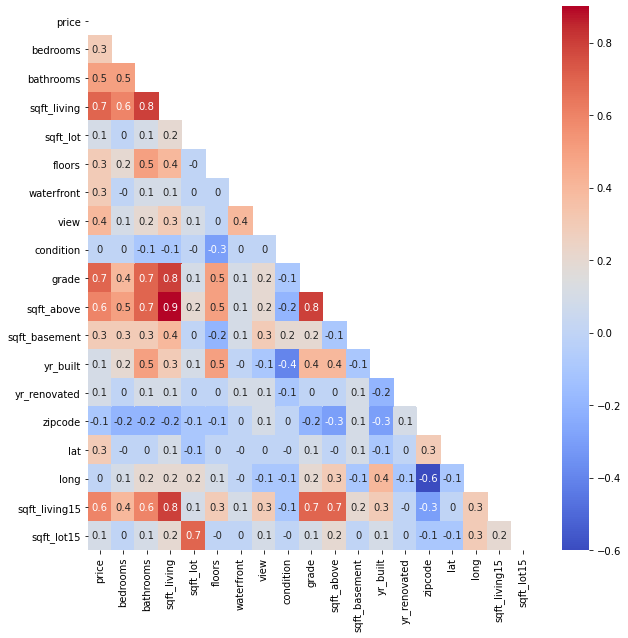

In [18]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(round(houses_dum.corr(), 1)
                 ,annot=True
                 ,mask=mask
                 ,cmap='coolwarm')


# Adding new features <a class = "anchor" id = "newfeatures"></a>

## Price per Sqft <a class = "anchor" id = "pricepersqft"></a>

In [19]:
houses.eval("price_per_sqft = price / sqft_living", inplace=True)

## Binning of Bedrooms and Bathrooms <a class = "anchor" id = "binningbb"></a>

In [20]:
houses["bathrooms_rounded"] = [np.ceil(b) for b in houses.bathrooms.values]

In [21]:
bins = [1, 2, 3, 4, 5, 6, 8, 34]
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-8", ">8"]

bedrooms_binned = pd.cut(houses.bedrooms, bins=bins, labels=labels)
bedrooms_binned.name = "bedrooms_binned"

houses["bedrooms_binned"] = bedrooms_binned

In [22]:
bins = [0, 1, 2, 3, 4, 9]
labels = ["0-1", "1-2", "2-3", "3-4", ">4"]

bathrooms_binned = pd.cut(houses.bathrooms, bins=bins, labels=labels)
bathrooms_binned.name = "bathrooms_binned"

houses["bathrooms_binned"] = bathrooms_binned

## new feature: sqft_living / bedrooms

In [23]:
houses["sqft_per_bedrooms"] = houses.sqft_living / houses.bedrooms

## new feature: bedrooms / bathrooms

In [24]:
houses["bed_per_bath"] = houses.bedrooms / houses.bathrooms

# Plots

## Histograms of Price and Price/Sqft

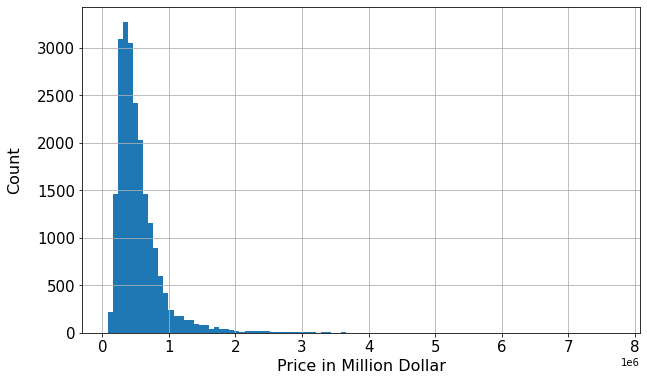

In [25]:
%matplotlib inline
fig, ax = plt. subplots(figsize=(10, 6))
houses.price.hist(bins=100)
plt.xlabel("Price in Million Dollar", fontdict={"fontsize":16})
plt.ylabel("Count", labelpad=15, fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/price_histogram.png');

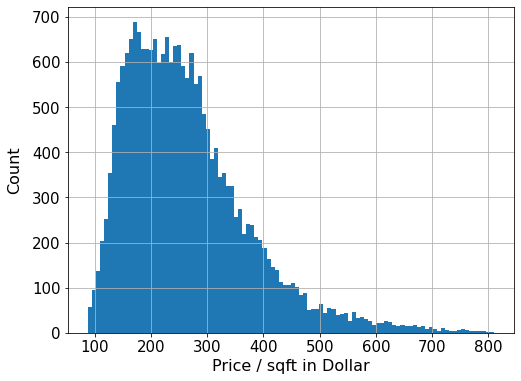

In [26]:
%matplotlib inline
fig, ax = plt. subplots(figsize=(8, 6))
houses.price_per_sqft.hist(bins=100)
plt.xlabel("Price / sqft in Dollar", fontdict={"fontsize":16})
plt.ylabel("Count", labelpad=10, fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/price_sqft_hist.png');

### Price/Sqft vs. Grade

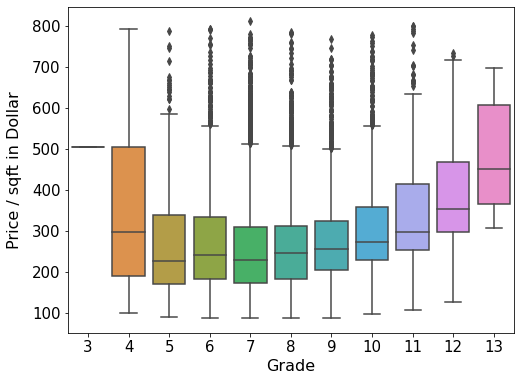

In [27]:
fig, ax = plt. subplots(figsize=(8, 6))
sns.boxplot(data=houses, x="grade", y="price_per_sqft", 
           # hue="grade"
           )
plt.xlabel("Grade", fontdict={"fontsize":16})
plt.ylabel("Price / sqft in Dollar", labelpad=10, 
           fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/price_grade.png');

## Sqft/Bedroom vs. Grade

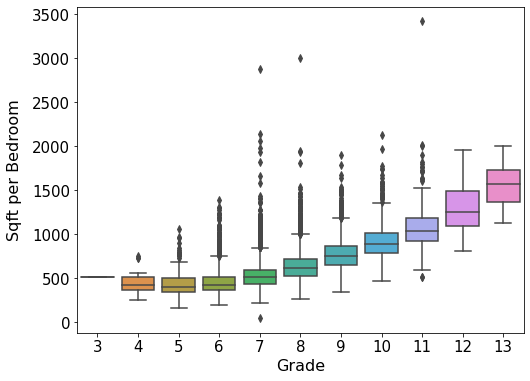

In [28]:
fig, ax = plt. subplots(figsize=(8, 6))
sns.boxplot(data=houses, x="grade", y="sqft_per_bedrooms")
plt.xlabel("Grade", fontdict={"fontsize":16})
plt.ylabel("Sqft per Bedroom", labelpad=10, 
           fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/sqft_bedroom_grade.png');

## Grade vs. Condition and View

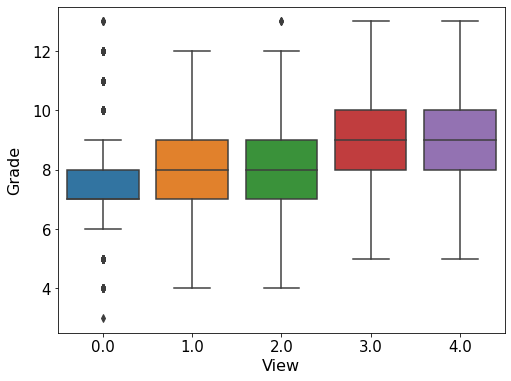

In [29]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=houses, x="view", y="grade")
plt.xlabel("View", fontdict={"fontsize":16})
plt.ylabel("Grade", labelpad=10, 
           fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/grade_view.png');

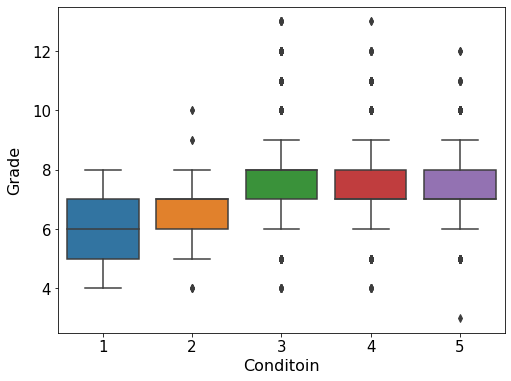

In [30]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=houses, x="condition", y="grade")
plt.xlabel("Conditoin", fontdict={"fontsize":16})
plt.ylabel("Grade", labelpad=10, 
           fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/grade_condition.png');

## Price/Sqft vs. Year Built

In [31]:
bins = [i for i in range(1900, 2023, 10)]
labels = [i for i in range(12)]

yr_binned = pd.cut(houses.yr_built, bins=bins, labels=labels)
#houses_binned
yr_binned.name = "yr_binned"

houses = pd.concat([houses, yr_binned], axis=1)
houses.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0         NaN   0.0          3      7        1180   
1      7242     2.0         0.0   0.0          3      7        2170   
2     10000     1.0         0.0   0.0          3      6         770   
3      5000     1.0         0.0   0.0          5      7        1050   
4      8080     1.0         0.0   0.0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0            0.0      1955           0.0    98178  47.5112 -122.257   
1          400.0      1951        1991.0    98125  47.7210 -122.319   
2            0.0      1933           NaN    98028  47.7379 -122.233   
3          910.0      1965           0.0    98136  47.5208 -122.393   
4            0.0      1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  price_per_sqft  bathrooms_rounded  \
0           1340        5650      188.050847                1.0   
1           1690        7639      209.338521                3.0   
2           2720        8062      233.766234                1.0   
3           1360        5000      308.163265                3.0   
4           1800        7503      303.571429                2.0   

  bedrooms_binned bathrooms_binned  sqft_per_bedrooms  bed_per_bath yr_binned  
0             2-3              0-1         393.333333      3.000000         5  
1             2-3              2-3         856.666667      1.333333         5  
2             1-2              0-1         385.000000      2.000000         3  
3             3-4              2-3         490.000000      1.333333         6  
4             2-3              1-2         560.000000      1.500000         8

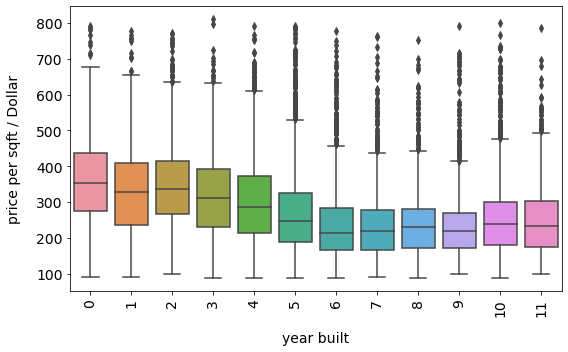

In [32]:
grouped = houses.groupby("yr_binned").median()

fig, ax = plt.subplots(figsize=(8,5))
sns.boxplot(x=houses["yr_binned"].values, y=houses.price_per_sqft.values, data=houses)
plt.xlabel("year built", labelpad=15, fontdict={"fontsize":14})
plt.ylabel("price per sqft / Dollar", labelpad=15, fontdict={"fontsize":14})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig("figures/price_year.png");

### Map Yr_Built

In [33]:
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'price_per_sqft',
       'bathrooms_rounded', 'bedrooms_binned', 'bathrooms_binned',
       'sqft_per_bedrooms', 'bed_per_bath', 'yr_binned'],
      dtype='object')

In [34]:
houses['year_bins'] = houses.yr_built.map(lambda x: 1 if x >= 1900 and x <= 1940
                            else (2 if x > 1940 and x <= 1980
                                 else 3))

In [35]:
lat1 = houses.loc[houses['year_bins'] == 1].lat
long1 = houses.loc[houses['year_bins'] == 1].long

lat2 = houses.loc[houses['year_bins'] == 2].lat
long2 = houses.loc[houses['year_bins'] == 2].long

lat3 = houses.loc[houses['year_bins'] == 3].lat
long3 = houses.loc[houses['year_bins'] == 3].long

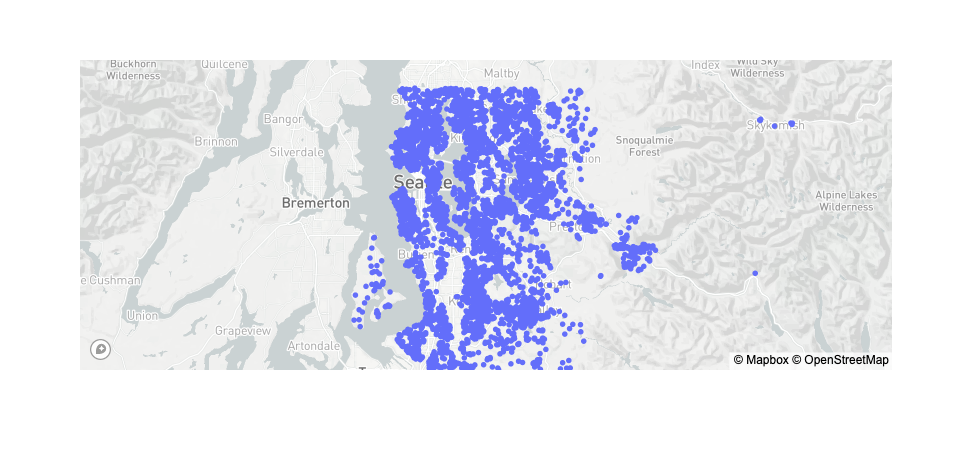

In [36]:
px.set_mapbox_access_token(open(".mapbox_token").read())

#fig = px.scatter_mapbox(houses, lat=lat2, lon=long2)
#fig = px.scatter_mapbox(houses, lat=lat1, lon=long1)
fig = px.scatter_mapbox(houses, lat=lat3, lon=long3)
               #         , 
               #         size="grade",
                        #color_continuous_scale=px.colors.cyclical.IceFire, 
                #        size_max=5, zoom=8, width=600, height=600)
fig.show()

## Price_per_sqft vs. View

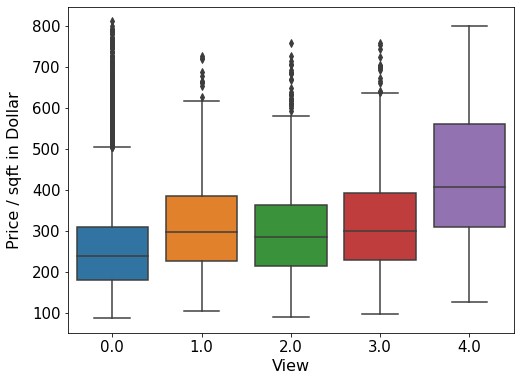

In [37]:
fig = plt.subplots(figsize=(8,6))
sns.boxplot(data=houses, x="view", y="price_per_sqft")
plt.xlabel("View", fontdict={"fontsize":16})
plt.ylabel("Price / sqft in Dollar", labelpad=10, 
           fontdict={"fontsize":16})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('figures/price_view.png');

## Price/Sqft vs. Bedrooms and Bathrooms

### Size of Dots: Sqft per Bedroom

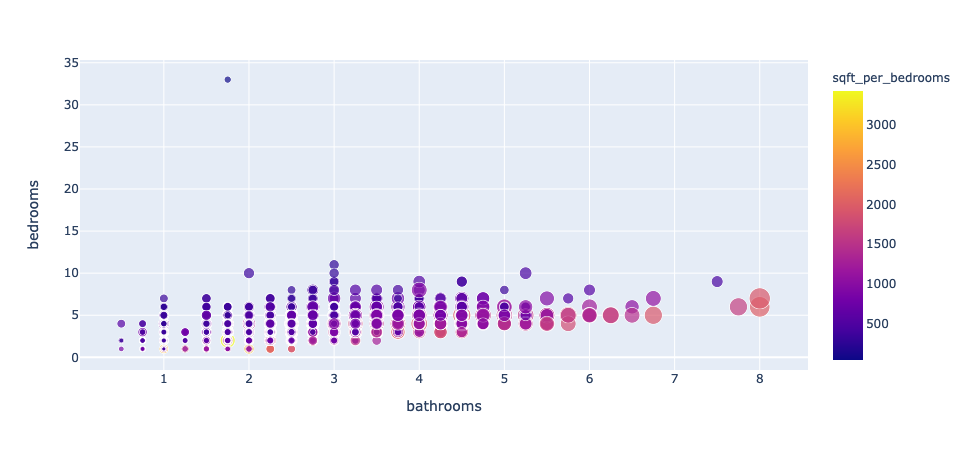

In [39]:
fig_scatter = px.scatter(houses, x = "bathrooms", y = "bedrooms", 
                         size = "sqft_living", 
                         color = "sqft_per_bedrooms",
                         hover_data = ["grade"],
                         size_max=15)
fig_scatter.show()

### Size of Dots: Sqft Living

In [ ]:
fig_scatter = px.scatter(houses, x = "bathrooms", y = "bedrooms", 
                         color = "price_per_sqft", 
                         size = "sqft_living",
                         hover_data = ["grade"])
fig_scatter.show()

## When is the best time of year to buy a house?

In [ ]:
e = houses.copy()


e["months"] = [float(d.split("/")[0]) for d in e.date]

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

In [ ]:
f = e.groupby("months").mean()
g = e.groupby("months").median()

f.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))
f.price_per_sqft.plot(label="mean")
g.price_per_sqft.plot(label="median")
plt.xlabel("Month", fontdict={"fontsize":15}, labelpad=15)
plt.xticks(range(1, 13), labels=months)
plt.ylabel("Price per sqft / Dollar", 
           labelpad=15, 
           fontdict={"fontsize":15})
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.savefig("figures/price_month.png");

## Where are the rich neighborhoods?

In [ ]:
price_binned = pd.qcut(houses.price_per_sqft, q=5, labels=["{}".format(i) for i in range(5)])

price_binned.name = "price_quintile"

houses = pd.concat([houses, price_binned], axis=1)
houses.head()

In [ ]:
px.set_mapbox_access_token(open(".mapbox_token").read())

fig = px.scatter_mapbox(houses, lat="lat", lon="long", 
                        color="price_quintile", 
                        size="grade",
                        #color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=5, zoom=8, width=600, height=600)
fig.show()

## Map of Grades

In [ ]:
fig = px.scatter_mapbox(houses, lat="lat", lon="long", 
                        color="grade", 
                        size="price_per_sqft",
                        hover_data=["price", "view"],
                        #color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=7, zoom=8, width=600, height=600)
fig.show()

## Map of Year Built

# Multivariate Linear Regression

## Defininge the Mean Absolute Percentage Error

In [ ]:
def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true))

## Creating Copy of Dataframe

In [ ]:
houses.dropna(how='any', subset=['view', 'waterfront'], inplace=True)

nulls = pd.DataFrame(houses.isnull().sum(), columns=["n_nan"])
nulls["percentage"] = round(nulls.n_nan/houses.shape[0]*100, 1)
nulls[nulls.n_nan!=0]

In [ ]:
lr = houses.copy()

## Make Dummy Columns for Categorical Variables

In [ ]:
(houses.zipcode.nunique() 
 + houses.view.nunique() 
 + houses.grade.nunique() 
 + houses.yr_built.nunique())

In [ ]:
lr["log_price"] = np.log(lr.price)

In [ ]:
drop = False
zip_dummies = pd.get_dummies(lr.zipcode, 
                             prefix='zip', 
                             drop_first=drop,
                             dtype=float)

yr_dummies = pd.get_dummies(lr.yr_built,
                            prefix='yr', 
                            drop_first=drop,
                            dtype=float)

view_dummies = pd.get_dummies(lr.view, 
                              prefix='view', 
                              drop_first=drop,
                              dtype=float)

grade_dummies = pd.get_dummies(lr.grade,
                               prefix='grade',
                               drop_first=drop,
                               dtype=float)



In [ ]:
lr.head()

In [ ]:
lr = lr.drop(['zipcode', 'yr_built', 'view', 'grade', 'id', 'date',
           #   'bedrooms', 
          #    'bathrooms', 
              'sqft_lot'], axis=1)

In [ ]:
lr = pd.concat([lr, zip_dummies, yr_dummies, 
                view_dummies, 
                grade_dummies],
               axis=1)

In [ ]:
regressors = ["sqft_living", "waterfront", "condition", "bathrooms", "bedrooms"]

for col in lr.columns:
    if col[:4] == "zip_":
        regressors.append(col)
    if col[:6] == "grade_":
        regressors.append(col)
    if col[:5] == "view_":
        regressors.append(col)
    if col[:3] == "yr_" and col != "yr_renovated":
        regressors.append(col)
        
print(len(regressors))

In [ ]:
train, test = train_test_split(lr, train_size = 0.8)
model = linear_model.LinearRegression()
model.fit(train[regressors], train["price"])

In [ ]:
print(model.score(train[regressors], train['price']),
    model.score(test[regressors], test['price']))

In [ ]:
predicted_values_train = model.predict(train[regressors])
mape(train["price"], predicted_values_train)

In [ ]:
predicted_values_test = model.predict(test[regressors])
mape(test["price"], predicted_values_test)

In [ ]:
fig_scatter = px.scatter(x = predicted_values_test, y = res, trendline = "ols", 
                         labels = {"x": "Price", "y": "Residuals"}, size_max=1
                      #   color = "price_per_sqft", 
                      #   size = "sqft_living",
                      #   hover_data = ["grade"]
                        )
fig_scatter.show()

## Fit ln(price)

In [ ]:
lr = houses.copy()

In [ ]:
lr["log_price"] = np.log(lr.price)

In [ ]:
drop = True
zip_dummies = pd.get_dummies(lr.zipcode, 
                             prefix='zip', 
                             drop_first=drop,
                             dtype=float)

yr_dummies = pd.get_dummies(lr.yr_built,
                            prefix='yr', 
                            drop_first=drop,
                            dtype=float)

view_dummies = pd.get_dummies(lr.view, 
                              prefix='view', 
                              drop_first=drop,
                              dtype=float)

grade_dummies = pd.get_dummies(lr.grade,
                               prefix='grade',
                               drop_first=drop,
                               dtype=float)

In [ ]:
lr = lr.drop(['zipcode', 'yr_built', 'view', 'grade', 'id', 'date',
              'bedrooms', 
          #    'bathrooms', 
              'sqft_lot'], axis=1)

In [ ]:
lr = pd.concat([lr, zip_dummies, yr_dummies, 
                view_dummies, 
                grade_dummies],
               axis=1)

In [ ]:
regressors = ["sqft_living"]

for col in lr.columns:
    if col[:4] == "zip_":
        regressors.append(col)
    if col[:6] == "grade_":
        regressors.append(col)
    if col[:5] == "view_":
        regressors.append(col)
    if col[:3] == "yr_" and col != "yr_renovated":
        regressors.append(col)
        
print(len(regressors))

In [ ]:
train, test = train_test_split(lr, train_size = 0.8)
model = linear_model.LinearRegression()
model.fit(train[regressors], train["log_price"])

print(model.score(train[regressors], train['log_price']),
    model.score(test[regressors], test['log_price']))

predicted_values_train = model.predict(train[regressors])
print(mape(train["log_price"], predicted_values_train))

predicted_values_test = model.predict(test[regressors])
print(mape(test["log_price"], predicted_values_test))

In [ ]:
fig_scatter = px.scatter(x = predicted_values_test, y =test["log_price"]-predicted_values_test, trendline = "ols", 
                         labels = {"x": "Price", "y": "Residuals"}, size_max=1
                      #   color = "price_per_sqft", 
                      #   size = "sqft_living",
                      #   hover_data = ["grade"]
                        )
fig_scatter.show()